importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## loading dataset

In [2]:
import os

file_path = r"C:\Users\USER\Desktop\Deloitte\Measurements Dataset.csv" ## to confirm file path
print(os.path.exists(file_path))

True


In [3]:
with open(file_path, 'rb') as f:
    content = f.read(100)  # Read first 100 bytes
    print(content)

b',date,location,IP address,component,interaction,duration,downtime\r\n0,8/18/2021,"950 Rebecca Ranch Su'


In [4]:
encodings = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']
for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f"Successfully read with {enc}")
        break
    except Exception as e:
        print(f"Failed with {enc}: {e}")

Successfully read with utf-8


In [5]:
df.head(10)

,Unnamed: 0,date,location,IP address,component,interaction,duration,downtime
0,0,8/18/2021,"950 Rebecca Ranch Suite 170\nNew Scott, NH 81801",165.61.147.242,mongodb database,other,16.90,13.89
1,1,6/8/2021,"55068 Kyle Centers\nNorth Jenniferhaven, HI 44276",159.146.10.26,sap shipping management system,invalid SAP unit code,80.96,0.00
2,2,8/1/2021,"60517 Richard Lake\nLake Lori, NJ 37360",129.94.76.202,sap shipping management system,server error,49.47,0.00
3,3,8/3/2021,"829 Cox Ferry\nNicholasshire, VA 23634",49.137.245.5,django controller,HTTP 401 response,2.56,0.00
4,4,8/10/2021,"940 Odom Lodge\nTimothyburgh, AZ 75746",172.200.143.223,ios frontend,dormant,47.26,0.00
5,5,6/28/2021,624 Christopher Square Suite 948\nChristopherf...,124.187.174.229,android frontend,scroll,69.21,0.00
6,6,6/3/2021,"60885 Victoria Island\nEast Stanleyton, CO 31376",18.22.86.97,ios frontend,dropdown click,87.55,69.05
7,7,8/5/2021,Unit 2522 Box 8150\nDPO AA 53572,132.103.2.51,ai engine,training data error,23.73,24.64
8,8,7/13/2021,87327 Richard Station Apt. 638\nWest Josephshi...,210.236.48.211,web frontend,click,87.32,0.00
9,9,7/9/2021,"1245 Audrey Bridge\nAlanland, GA 68879",115.166.126.21,web frontend,scroll,60.06,0.00


In [6]:
df.describe()

,Unnamed: 0,duration,downtime
count,7566.000000,7566.000000,7566.000000
mean,3782.500000,49.055133,25.154978
std,2184.260401,28.637389,30.581321
min,0.000000,0.010000,0.000000
25%,1891.250000,23.950000,0.000000
50%,3782.500000,49.035000,10.815000
75%,5673.750000,73.967500,46.097500
max,7565.000000,99.000000,98.970000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7566 non-null   int64  
 1   date         7566 non-null   object 
 2   location     7566 non-null   object 
 3   IP address   7566 non-null   object 
 4   component    7566 non-null   object 
 5   interaction  7566 non-null   object 
 6   duration     7566 non-null   float64
 7   downtime     7566 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 473.0+ KB


## cleaning data

In [8]:
df.isnull().sum()

Unnamed: 0     0
date           0
location       0
IP address     0
component      0
interaction    0
duration       0
downtime       0
dtype: int64

<Axes: xlabel='component', ylabel='duration'>

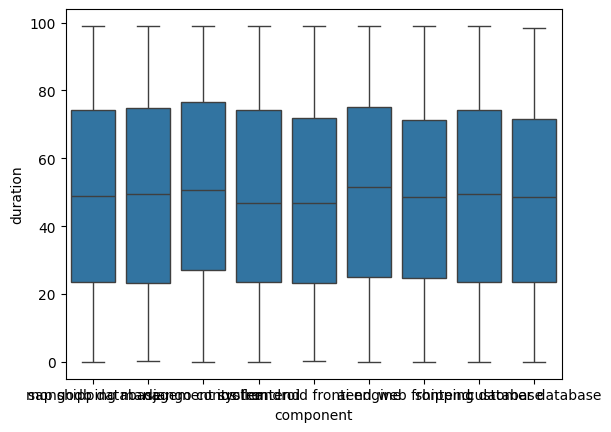

In [9]:
sns.boxplot(x="component",y="duration",data=df) ## to check outliers

## calculating downtime percentage

In [10]:
##filtering out components with zero down time
df_non_zero = df[df['downtime'] > 0].copy()

In [11]:
df_non_zero.loc[:, 'downtime_Percentage'] = (df_non_zero['downtime'] / df_non_zero['duration']).fillna(0)

In [12]:
df_non_zero.head(10)

,Unnamed: 0,date,location,IP address,component,interaction,duration,downtime,downtime_Percentage
0,0,8/18/2021,"950 Rebecca Ranch Suite 170\nNew Scott, NH 81801",165.61.147.242,mongodb database,other,16.90,13.89,0.821893
6,6,6/3/2021,"60885 Victoria Island\nEast Stanleyton, CO 31376",18.22.86.97,ios frontend,dropdown click,87.55,69.05,0.788692
7,7,8/5/2021,Unit 2522 Box 8150\nDPO AA 53572,132.103.2.51,ai engine,training data error,23.73,24.64,1.038348
10,10,6/25/2021,"28814 Matthew Passage\nCharlesmouth, VA 66675",5.20.98.73,shipping database,potential SSH threat,97.78,95.00,0.971569
11,11,6/5/2021,"60062 Lisa Alley Suite 344\nWest Autumn, NM 74622",191.232.137.142,django controller,HTTP 500 response,44.84,41.13,0.917261
12,12,7/22/2021,"52989 Jennifer Forks\nNashfurt, NY 13858",215.207.149.102,android frontend,bounce,95.47,0.70,0.007332
17,17,5/26/2021,"745 Turner Alley Apt. 475\nSandramouth, VT 56296",213.126.141.78,web frontend,bounce,92.02,19.83,0.215497
19,19,7/4/2021,6456 Garcia Highway Apt. 560\nSouth Brandonhav...,132.229.112.194,mongodb database,SQL injection threat,21.93,2.13,0.097127
21,21,8/9/2021,"722 Christopher Course\nLake Alexandra, ID 91346",114.233.164.118,ai engine,training data error,44.04,32.42,0.736149
22,22,7/5/2021,"208 Tonya Underpass Suite 893\nLesterfort, KS ...",209.98.162.55,ai engine,bias detected in training data,22.24,15.94,0.716727


In [13]:
# Calculate mean and standard deviation of downtime
mean_downtime = df_non_zero['downtime'].mean()
std_downtime = df_non_zero['downtime'].std()

# Define a threshold as mean + 1 standard deviation
high_downtime_threshold = mean_downtime + std_downtime
print(f"Downtime Threshold (Mean + 1 Std Dev): {high_downtime_threshold} seconds")

Downtime Threshold (Mean + 1 Std Dev): 69.10726729159401 seconds


## defining risk scores and down time threshold

In [14]:
def calculate_risk_score(row):
    # Weights assigned to different risk factors
    downtime_weight = 0.7
    interaction_weight = 0.5

    # To apply a penalty if the component's downtime is above the defined high downtime threshold
    high_downtime_penalty = 1.2 if row['downtime'] >= high_downtime_threshold else 1.0

    # To calculate interaction frequency for the component
    interaction_frequency = df_non_zero['component'].value_counts().get(row['component'], 0)

    # Calculate the risk score by combining downtime percentage, interaction frequency, and applying the penalty
    risk_score = (row['downtime_Percentage'] * downtime_weight +
                  interaction_frequency * interaction_weight) * high_downtime_penalty
    
    return risk_score

# Apply the calculate_risk_score function to each row of the DataFrame
df_non_zero['Risk_Score'] = df_non_zero.apply(calculate_risk_score, axis=1)

# Display the DataFrame to see the results
print(df_non_zero)

      Unnamed: 0       date  \
0              0  8/18/2021   
6              6   6/3/2021   
7              7   8/5/2021   
10            10  6/25/2021   
11            11   6/5/2021   
...          ...        ...   
7556        7556  6/13/2021   
7559        7559  8/19/2021   
7561        7561  6/22/2021   
7563        7563  6/17/2021   
7565        7565   7/6/2021   

                                               location       IP address  \
0      950 Rebecca Ranch Suite 170\nNew Scott, NH 81801   165.61.147.242   
6      60885 Victoria Island\nEast Stanleyton, CO 31376      18.22.86.97   
7                      Unit 2522 Box 8150\nDPO AA 53572     132.103.2.51   
10        28814 Matthew Passage\nCharlesmouth, VA 66675       5.20.98.73   
11    60062 Lisa Alley Suite 344\nWest Autumn, NM 74622  191.232.137.142   
...                                                 ...              ...   
7556            33089 Cohen Loop\nRogersshire, HI 13342   158.71.252.100   
7559  6200 Debbie V

In [15]:
df_non_zero.head(10)

,Unnamed: 0,date,location,IP address,component,interaction,duration,downtime,downtime_Percentage,Risk_Score
0,0,8/18/2021,"950 Rebecca Ranch Suite 170\nNew Scott, NH 81801",165.61.147.242,mongodb database,other,16.90,13.89,0.821893,406.575325
6,6,6/3/2021,"60885 Victoria Island\nEast Stanleyton, CO 31376",18.22.86.97,ios frontend,dropdown click,87.55,69.05,0.788692,205.552085
7,7,8/5/2021,Unit 2522 Box 8150\nDPO AA 53572,132.103.2.51,ai engine,training data error,23.73,24.64,1.038348,395.726844
10,10,6/25/2021,"28814 Matthew Passage\nCharlesmouth, VA 66675",5.20.98.73,shipping database,potential SSH threat,97.78,95.00,0.971569,502.416118
11,11,6/5/2021,"60062 Lisa Alley Suite 344\nWest Autumn, NM 74622",191.232.137.142,django controller,HTTP 500 response,44.84,41.13,0.917261,219.142083
12,12,7/22/2021,"52989 Jennifer Forks\nNashfurt, NY 13858",215.207.149.102,android frontend,bounce,95.47,0.70,0.007332,204.005133
17,17,5/26/2021,"745 Turner Alley Apt. 475\nSandramouth, VT 56296",213.126.141.78,web frontend,bounce,92.02,19.83,0.215497,202.150848
19,19,7/4/2021,6456 Garcia Highway Apt. 560\nSouth Brandonhav...,132.229.112.194,mongodb database,SQL injection threat,21.93,2.13,0.097127,406.067989
21,21,8/9/2021,"722 Christopher Course\nLake Alexandra, ID 91346",114.233.164.118,ai engine,training data error,44.04,32.42,0.736149,395.515304
22,22,7/5/2021,"208 Tonya Underpass Suite 893\nLesterfort, KS ...",209.98.162.55,ai engine,bias detected in training data,22.24,15.94,0.716727,395.501709


## getting the top 3 risky components

In [16]:
# Group by component and calculate the average risk score for each
component_risk = df_non_zero.groupby('component')['Risk_Score'].mean().reset_index()

# Rank components by risk score in descending order
component_risk = component_risk.sort_values(by='Risk_Score', ascending=False)

# Get the top 3 risky components
top_3_risky_components = component_risk.head(3)

print("Top 3 Risky Components:")
print(top_3_risky_components)

Top 3 Risky Components:
           component  Risk_Score
7  shipping database  438.720558
5   mongodb database  425.920506
0          ai engine  412.816613


## visualization

C:\Users\USER\AppData\Local\Temp\ipykernel_6840\112731661.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risk_Score', y='Component', data=df_top_risks, palette='viridis')


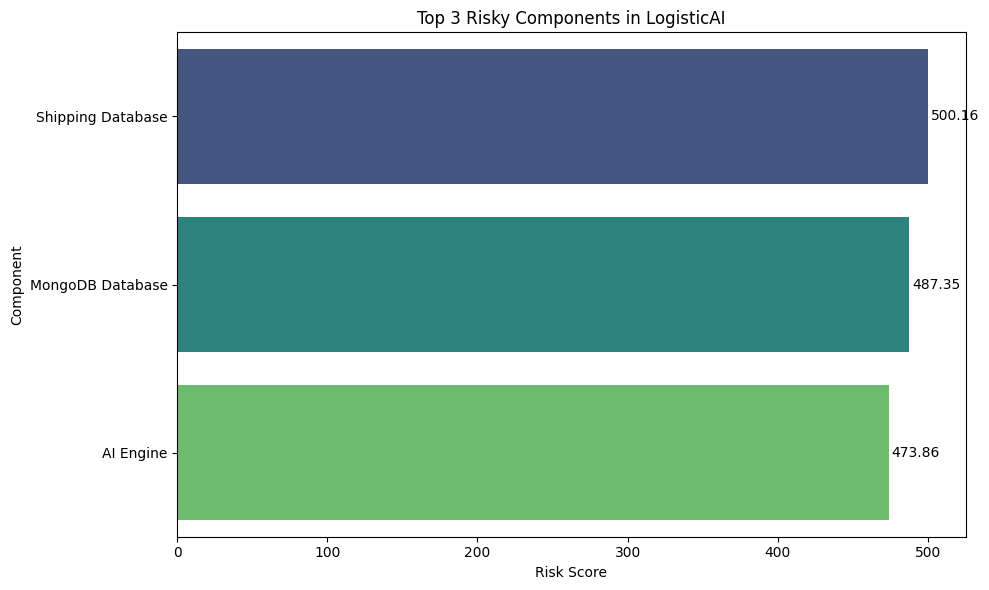

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for plotting
data = {
    'Component': ['Shipping Database', 'MongoDB Database', 'AI Engine'],
    'Risk_Score': [500.16, 487.35, 473.86]
}

# Create DataFrame
df_top_risks = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Risk_Score', y='Component', data=df_top_risks, palette='viridis')

# Add labels and title
plt.xlabel('Risk Score')
plt.ylabel('Component')
plt.title('Top 3 Risky Components in LogisticAI')

# Display the risk score values on the bars
for index, value in enumerate(df_top_risks['Risk_Score']):
    plt.text(value + 2, index, f'{value:.2f}', va='center')

# Show the plot
plt.tight_layout()
plt.show()